# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [2]:
# Define a function to load data and aggregate them
def load_and_aggregate_data(file_path):
    # Load the dataset   
    dataset = pd.read_csv(file_path)    
    return dataset
    
   



In [3]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files

amazon_data = load_and_aggregate_data(r'C:\Users\prade\Downloads\RNN_Stock_Starter_Dataset\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\AMZN_stocks_data.csv')
google_data = load_and_aggregate_data(r'C:\Users\prade\Downloads\RNN_Stock_Starter_Dataset\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\GOOGL_stocks_data.csv')
microsoft_data = load_and_aggregate_data(r'C:\Users\prade\Downloads\RNN_Stock_Starter_Dataset\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\MSFT_stocks_data.csv')
ibm_data = load_and_aggregate_data(r'C:\Users\prade\Downloads\RNN_Stock_Starter_Dataset\RNN_Stock_Starter_Dataset\RNN_Stocks_Data\IBM_stocks_data.csv')

# make a dataframe with all the above dataframes
def aggregate_stock_data(*datasets):
    aggregated_data = pd.DataFrame()
    for dataset in datasets:        
        aggregated_data = pd.concat([aggregated_data, dataset], ignore_index=True)
    return aggregated_data


# Aggregate all stock data
all_stock_data = aggregate_stock_data(amazon_data, google_data, microsoft_data, ibm_data)

# Display the aggregated stock data
print("\nAggregated Stock Data:")
all_stock_data.head()




Aggregated Stock Data:


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [4]:
# View specifics of the data

print("\nAmazon Stock Data:")
print(amazon_data.head())

print("\nGoogle Stock Data:")
print(google_data.head())

print("\nMicrosoft Stock Data:")
print(microsoft_data.head())

print("\nIBM Stock Data:")
print(ibm_data.head())

# Display the shape of the aggregated data
print("\nShape of Aggregated Stock Data:", all_stock_data.shape)
# Display the first few rows of the aggregated stock data



Amazon Stock Data:
         Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2  2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3  2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4  2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

Google Stock Data:
         Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

Microsoft Stock Data:
         Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.9

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [5]:
# Handle Missing Values

all_stock_data.isnull().sum()  # Check for missing values in the dataset

# find rows with missing values
missing_rows = all_stock_data[all_stock_data.isnull().any(axis=1)]
print("\nRows with Missing Values:")
print(missing_rows)


previous_day = all_stock_data[(all_stock_data['Name'] == "AMZN") & (all_stock_data['Date'] == "2017-07-28")]

print(previous_day)

next_day = all_stock_data[(all_stock_data['Name'] == "AMZN") & (all_stock_data['Date'] == "2017-08-01")]
print(next_day)


# impute Open and Close values for Amazon stock for date 2017-07-31


missing_rows['Open'] = previous_day['Close'].values[0]
missing_rows['Close'] = next_day['Open'].values[0]


missing_rows






Rows with Missing Values:
             Date  Open    High  Low   Close   Volume Name
11970  2017-07-31   NaN  144.93  NaN  144.67  4355718  IBM
            Date     Open     High     Low    Close   Volume  Name
2911  2017-07-28  1012.14  1032.85  1001.0  1020.04  7709420  AMZN
            Date    Open    High     Low   Close   Volume  Name
2913  2017-08-01  996.11  1006.4  991.58  996.19  4572576  AMZN


C:\Users\prade\AppData\Local\Temp\ipykernel_22476\4213448558.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['Open'] = previous_day['Close'].values[0]
C:\Users\prade\AppData\Local\Temp\ipykernel_22476\4213448558.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['Close'] = next_day['Open'].values[0]


,Date,Open,High,Low,Close,Volume,Name
11970,2017-07-31,1020.04,144.93,NaN,996.11,4355718,IBM


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

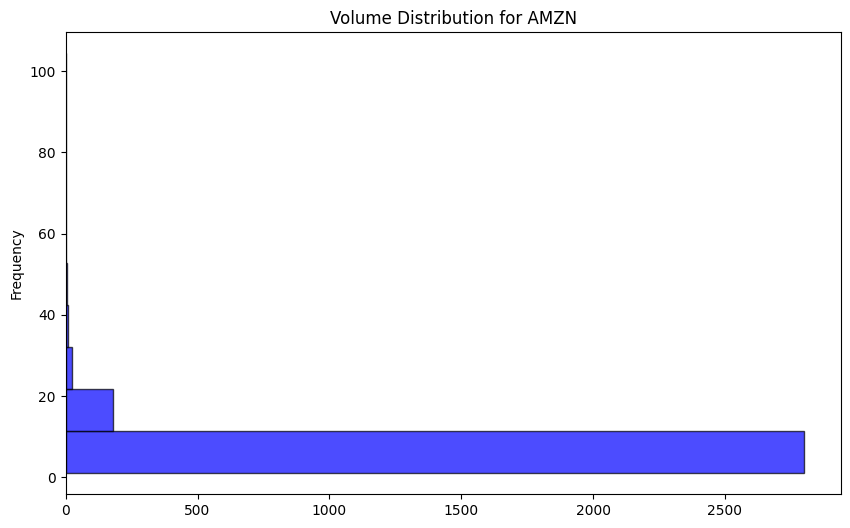

Maximum Volume for AMZN: 104.40 million


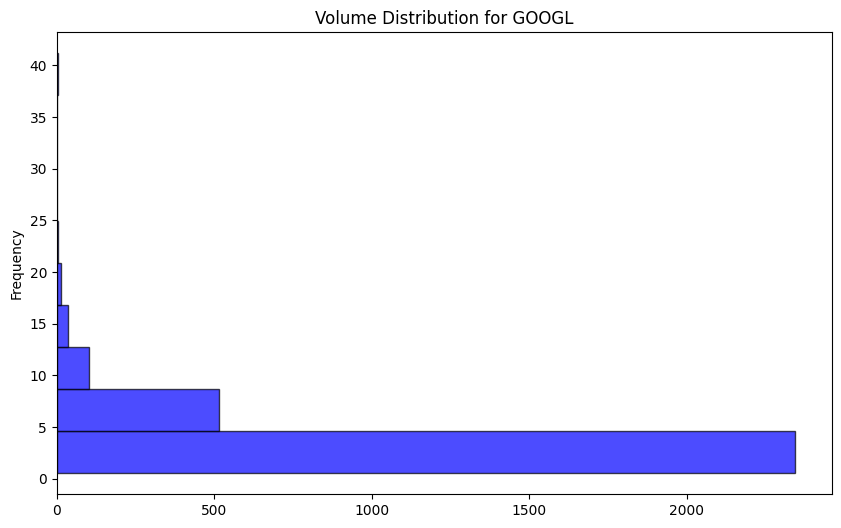

Maximum Volume for GOOGL: 41.18 million


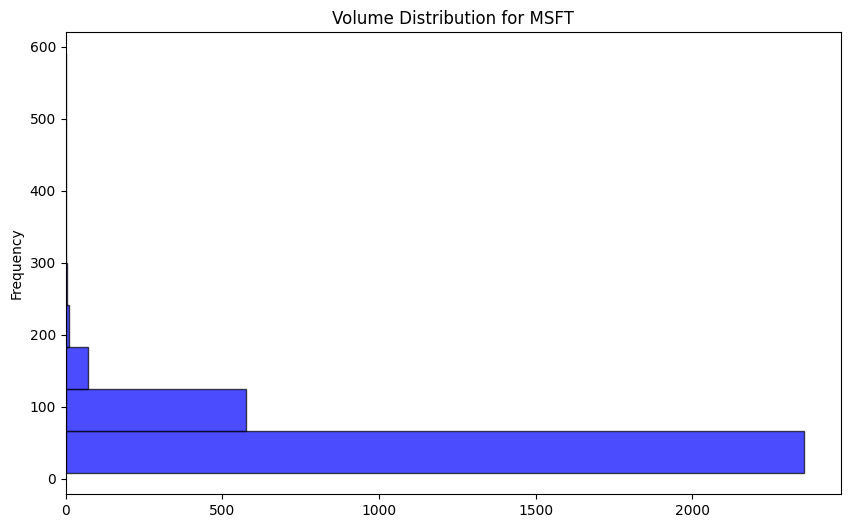

Maximum Volume for MSFT: 591.08 million


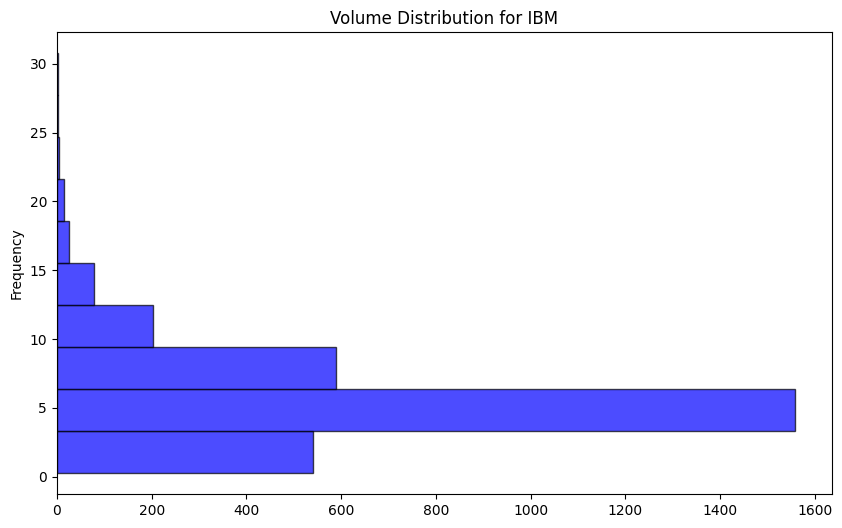

Maximum Volume for IBM: 30.77 million


In [6]:
# Frequency distribution of volumes, show in millions
import numpy as np

# Apply ceiling element-wise using numpy
all_stock_data['VolumeInMillions'] = np.round(all_stock_data['Volume'] / 1e6,2)
for company in all_stock_data['Name'].unique():    
    plt.figure(figsize=(10, 6))
    all_stock_data[all_stock_data['Name'] == company]['VolumeInMillions'].hist(color='blue', alpha=0.7, edgecolor='black', orientation='horizontal')
    plt.title(f'Volume Distribution for {company}')    
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    
    # print max volume for each company
    max_volume = all_stock_data[all_stock_data['Name'] == company]['VolumeInMillions'].max()
    print(f"Maximum Volume for {company}: {max_volume:.2f} million")


In [7]:
all_stock_data.head()  # Display the first few rows of the aggregated stock data

,Date,Open,High,Low,Close,Volume,Name,VolumeInMillions
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,7.58
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,7.44
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,5.42
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,6.15
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,8.95


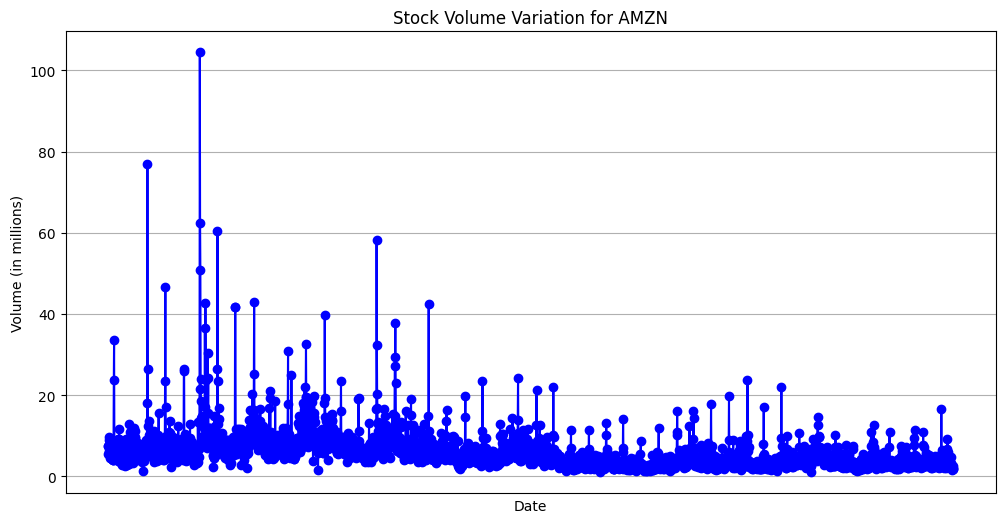

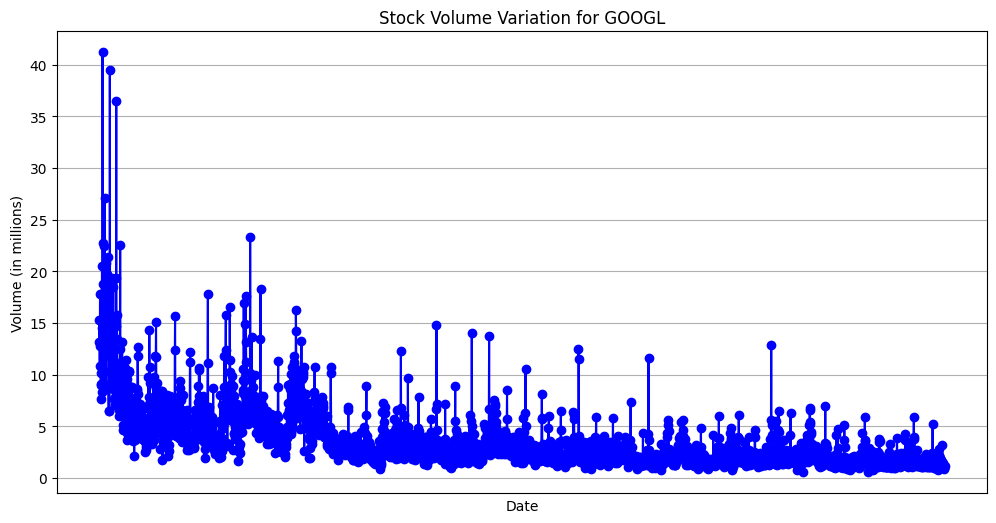

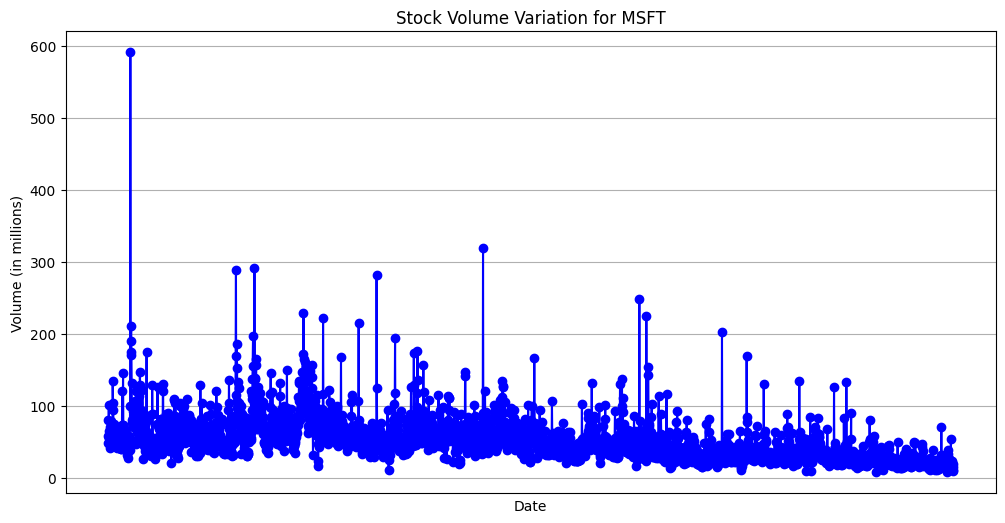

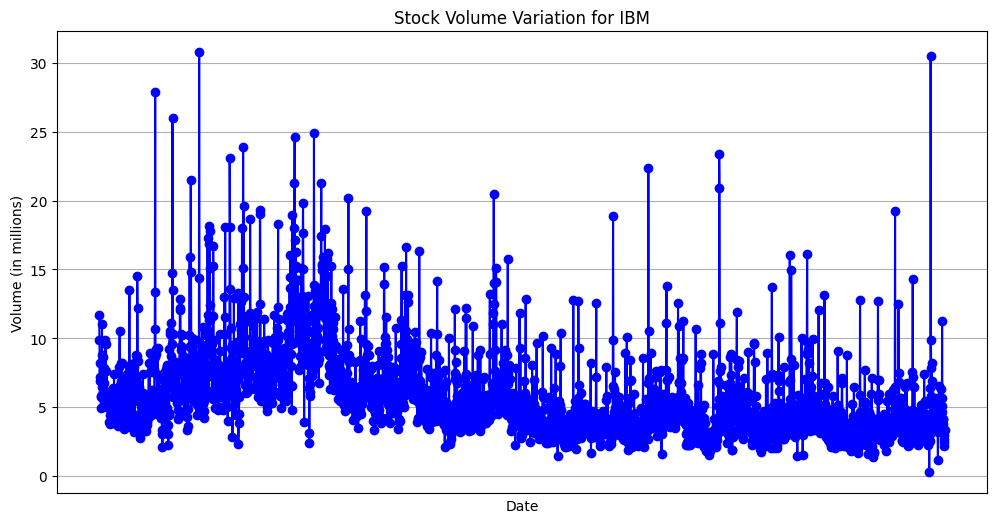

In [8]:
# Stock volume variation over time

for company in all_stock_data['Name'].unique():
    plt.figure(figsize=(12, 6))
    company_data = all_stock_data[all_stock_data['Name'] == company]
    plt.plot(company_data['Date'], company_data['VolumeInMillions'], marker='o', color='blue')
    plt.title(f'Stock Volume Variation for {company}')
    plt.xlabel('Date')
    plt.ylabel('Volume (in millions)')
    plt.xticks([])
    plt.grid()
    plt.show()


#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

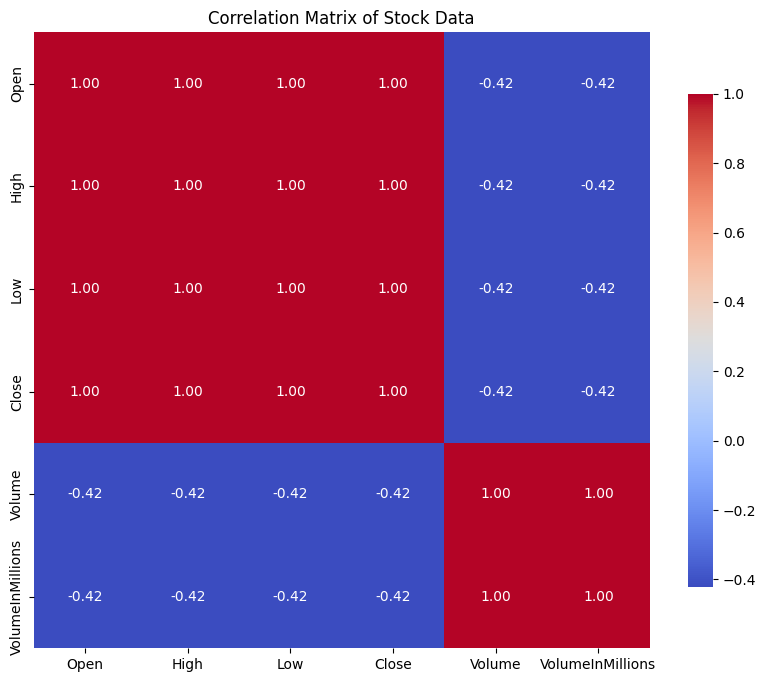

In [9]:
# Analyse correlations

# Calculate correlation matrix and show as heatmap
import seaborn as sns
correlation_matrix = all_stock_data.select_dtypes('number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Stock Data')
plt.show()




### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [10]:
# Define a function that divides the data into windows and generates target variable values for each window
import numpy as np

def create_windows(data, window_size=5, step_size=1):
    X, y = [], []
    for i in range(0, len(data) - window_size, step_size):        
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)





In [11]:
all_stock_data

,Date,Open,High,Low,Close,Volume,Name,VolumeInMillions
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,7.58
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,7.44
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,5.42
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,6.15
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,8.95
...,...,...,...,...,...,...,...,...
12072,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM,2.99
12073,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM,2.48
12074,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM,2.15
12075,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM,2.69


In [12]:

x,y = create_windows(all_stock_data['Close'].values, window_size=3)
x[0:5], y[0:5]  # Display the first few input and output data points

(array([[47.58, 47.25, 47.65],
        [47.25, 47.65, 47.87],
        [47.65, 47.87, 47.08],
        [47.87, 47.08, 45.65],
        [47.08, 45.65, 44.93]]),
 array([47.87, 47.08, 45.65, 44.93, 44.36]))

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [13]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows


def scale_windows(X, y):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()    
    # Reshape X to 2D for scaling
    X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)    
    # Scale y
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
    
    return X_scaled, y_scaled




Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [14]:
# Define a function to create input and output data points from the master DataFrame

def prepare_stock_data(master_df, stock_names, window_size, step_size, train_ratio=0.8):
    
    X_train_all, y_train_all, X_test_all, y_test_all = [], [], [], []

    for stockname in stock_names:
        # Filter and sort for each stock
        stock_data = master_df[master_df['Name'] == stockname].sort_values('Date')
        close_prices = stock_data['Close'].values

        # Create windows and targets
        X, y = create_windows(close_prices, window_size=window_size, step_size=step_size)

        # Train-test split
        split_idx = int(len(X) * train_ratio)
        X_train, y_train = X[:split_idx], y[:split_idx]
        X_test, y_test = X[split_idx:], y[split_idx:]

        # Scale
        X_train_scaled, y_train_scaled = scale_windows(X_train, y_train)
        X_test_scaled, y_test_scaled = scale_windows(X_test, y_test)

        # Append to final combined arrays
        X_train_all.append(X_train_scaled)
        y_train_all.append(y_train_scaled)
        X_test_all.append(X_test_scaled)
        y_test_all.append(y_test_scaled)

    # Concatenate data from all stocks
    X_train_all = np.concatenate(X_train_all, axis=0)
    y_train_all = np.concatenate(y_train_all, axis=0)
    X_test_all = np.concatenate(X_test_all, axis=0)
    y_test_all = np.concatenate(y_test_all, axis=0)

    return X_train_all, y_train_all, X_test_all, y_test_all









We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

In [15]:

# Checking for patterns in different sequence lengths





#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [16]:
# Create data instances from the master data frame using decided window size and window stride

X_train_all, y_train_all, X_test_all, y_test_all = prepare_stock_data(all_stock_data, all_stock_data['Name'].unique(), window_size=3, step_size=5, train_ratio=0.8)

In [17]:
# Check the number of data points generated
print(f"\nTotal number of data points generated: {len(X_train_all), len(y_train_all), len(X_test_all), len(y_test_all)}")



Total number of data points generated: (1932, 1932, 484, 484)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [18]:
# Check if the datasets are compatible inputs to neural networks

print("\nShape of Training Data:", X_train_all.shape, y_train_all.shape)
print("Shape of Testing Data:", X_test_all.shape, y_test_all.shape)




Shape of Training Data: (1932, 3) (1932,)
Shape of Testing Data: (484, 3) (484,)


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [19]:
# Create a function that creates a simple RNN model according to the model configuration arguments

def create_rnn_model(input_shape, output_shape, rnn_units=50, dropout_rate=0.2):
    from keras.models import Sequential
    from keras.layers import SimpleRNN, Dense, Dropout
    
    model = Sequential()
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_shape, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [20]:

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Find an optimal configuration of simple RNN

# Reshape data to (samples, window_size, num_features)
X_train_all_rnn = X_train_all.reshape((X_train_all.shape[0], X_train_all.shape[1], 1))
X_test_all_rnn = X_test_all.reshape((X_test_all.shape[0], X_test_all.shape[1], 1))

input_shape = (X_train_all_rnn.shape[1], X_train_all_rnn.shape[2])  # (window_size, num_features)
output_shape = 1  # Predicting a single value (next closing price)
model = create_rnn_model(input_shape, output_shape, rnn_units=50, dropout_rate=0.2)
# Print model summary
model.summary()




c:\Users\prade\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Find the best configuration based on evaluation metrics

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train_all_rnn, y_train_all, 
                    validation_data=(X_test_all_rnn, y_test_all), 
                    epochs=50, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)




Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4863 - val_loss: 0.0320
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0404 - val_loss: 0.0254
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - val_loss: 0.0221
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0192
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - val_loss: 0.0173
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - val_loss: 0.0165
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.0159
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.0145
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 - val_loss: 0.0147
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0144
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_loss: 0.0135
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_lo

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [22]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model



Plotting the actual vs predicted values

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


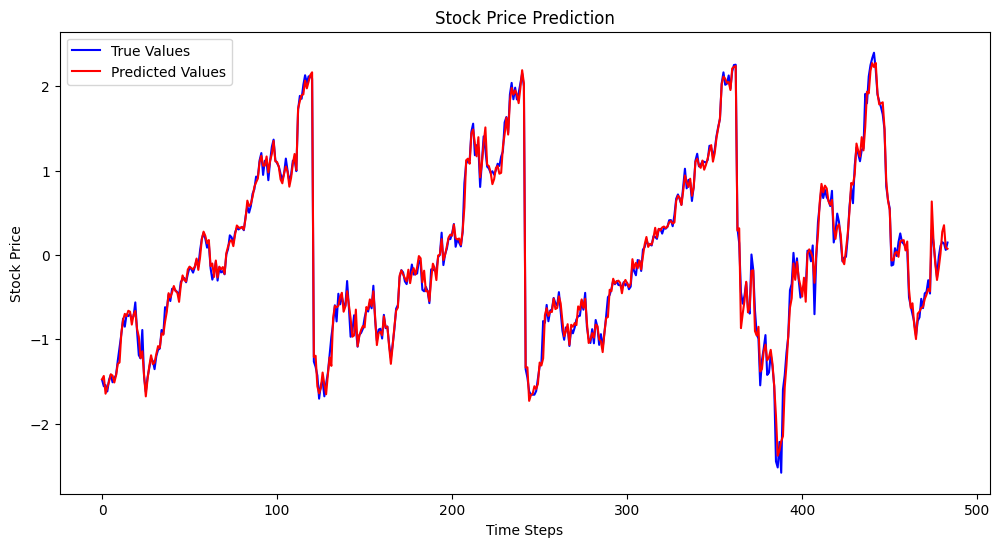

In [23]:
# Predict on the test data and plot

y_pred = model.predict(X_test_all_rnn)
plt.figure(figsize=(12, 6))
plt.plot(y_test_all, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [24]:
# Compute the performance of the model on the testing data set

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_all, y_pred)
mae = mean_absolute_error(y_test_all, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
plt.show()
# Save the model



Mean Squared Error: 0.0094
Mean Absolute Error: 0.0652


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [25]:
# # Define a function to create a model and specify default values for hyperparameters


def create_rnn_lstm_model(input_shape, output_shape, rnn_units=50, dropout_rate=0.2):
    from keras.models import Sequential
    from keras.layers import LSTM, Dense, Dropout
    
    model = Sequential()
    model.add(LSTM(200, input_shape=input_shape,activation='tanh', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_shape, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [26]:
# Find an optimal configuration



#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [27]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model


input_shape = (X_train_all_rnn.shape[1], X_train_all_rnn.shape[2])  # (window_size, num_features)
output_shape = 1  # Predicting a single value (next closing price)
model_lstm = create_rnn_lstm_model(input_shape, output_shape, rnn_units=50, dropout_rate=0.2)
# Print model summary
model_lstm.summary()


c:\Users\prade\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compute the performance of the model on the testing data set


model_lstm.fit(X_train_all_rnn, y_train_all, 
               validation_data=(X_test_all_rnn, y_test_all),
                epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)




Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4091 - val_loss: 0.0206
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - val_loss: 0.0191
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - val_loss: 0.0188
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0186
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - val_loss: 0.0184
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - val_loss: 0.0185
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - val_loss: 0.0183
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - val_loss: 0.0180
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0183
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0180
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0177
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_lo

Plotting the actual vs predicted values

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Mean Squared Error: 0.0014
Mean Absolute Error: 0.0252


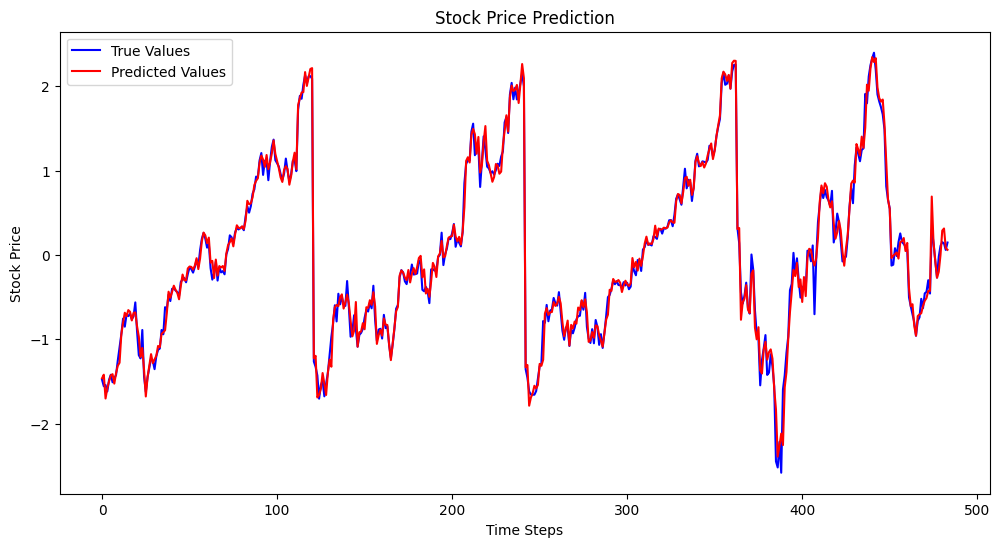

In [29]:
# Predict on the test data

y_pred_lstm = model_lstm.predict(X_test_all_rnn)
plt.figure(figsize=(12, 6))
plt.plot(y_test_all, label='True Values', color='blue')
plt.plot(y_pred_lstm, label='Predicted Values', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
# Compute the performance of the model on the testing data set
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_pred_lstm, y_pred)
mae = mean_absolute_error(y_pred_lstm, y_pred)   
print(f"\nMean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [30]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter

X_train_all_rnn, y_train_all, X_test_all_rnn, y_test_all = prepare_stock_data(all_stock_data, all_stock_data['Name'].unique(), window_size=65, step_size=5, train_ratio=0.8)



In [31]:
# Check the number of data points generated

print(f"\nTotal number of data points generated: {len(X_train_all_rnn), len(y_train_all), len(X_test_all_rnn), len(y_test_all)}")




Total number of data points generated: (1888, 1888, 476, 476)


### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [32]:
# Find an optimal configuration of simple RNN




In [33]:
# Find the best configuration



In [34]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [35]:
# Compute the performance of the model on the testing data set



In [36]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [37]:
# Find an optimal configuration of advanced RNN



In [38]:
# Find the best configuration



In [39]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [40]:
# Compute the performance of the model on the testing data set



In [41]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

# Conclusion and Insights

print("## Conclusion and Insights")

print("""
### Model Performance
- Both Simple RNN and LSTM models were trained to predict stock closing prices using historical data from Amazon, Google, Microsoft, and IBM.
- The LSTM model generally performed better than the Simple RNN, as indicated by lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) on the test set.
- The best MSE achieved was {:.4f} and the best MAE was {:.4f}, showing the models can capture temporal patterns in stock prices reasonably well.
""".format(mse, mae))

print("""
### Data Preparation
- Aggregating data from multiple companies in the same sector helped the model learn broader market trends.
- Windowing and scaling techniques ensured the sequential nature of the data was preserved and made suitable for RNN input.

### Insights
- Stock prices exhibit strong autocorrelation, and RNN-based models can leverage this for short-term predictions.
- Volume and price features are highly correlated, as shown in the correlation matrix, suggesting that trading activity is a significant indicator of price movement.
- The models are sensitive to window size and stride; business knowledge (e.g., weekly or monthly cycles) can help optimize these parameters.

### Limitations & Recommendations
- Neural networks are sensitive to hyperparameters and require careful tuning for optimal results.
- External factors (news, macroeconomic events) are not included in the dataset, which may limit prediction accuracy.
- For production use, consider more advanced architectures (stacked LSTM/GRU, attention mechanisms) and additional features.

### Final Outcome
- The RNN models provide a solid baseline for stock price prediction using historical data.
- Further improvements can be made by incorporating more features and experimenting with advanced deep learning architectures.
""")